<a href="https://colab.research.google.com/github/PaulToronto/AI-and-Machine-Learning-for-Coders---Book/blob/main/2_Introduction_to_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

## Counting Parameters (Weights)

<img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/weights.png'/>

- The **first layer** (shown inside the red border) of this neural network has **8 weights**
    - w0, w1, w2, w3, w4, w5
        - 3 input nodes x 2 nodes in hidden layer = 6 weights
    - b0, b1
        - each node in the hidden layer has a bias weight = 2 weights
- The **second layer** has **3 weights**
    - 2 input nodes x 1 output node = 2 weights
    - 1 bias weight = 1 weight

In [2]:
# let's construct this to see these counts in the model.summary()
model_to_see_counts = tf.keras.models.Sequential([

    # first layer
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(2),

    # second layer
    tf.keras.layers.Dense(1)
])

model_to_see_counts.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

- Notice that the numbers in the `Param #` column match the calculation of the number of weights made above

## The Data: Fashion MNIST

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
type(fashion_mnist)

module

In [5]:
type(train_images)

numpy.ndarray

In [6]:
train_images[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [7]:
train_labels[:3]

array([9, 0, 0], dtype=uint8)

### Fashion MNIST Labels

In [8]:
# a clothing item can be one of 10 classes
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
# the integers in the previous cell correspond to
#. these following class_names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
# the classes are balanced
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

### Fashion MNIST Images

In [11]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [12]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [13]:
train_images[0].dtype

dtype('uint8')

In [14]:
train_images[0].shape

(28, 28)

In [15]:
train_images[0].min(), train_images[0].max()

(0, 255)

Each images in a $28 \times 28$ numpy array of integers ranging from 0 to 255. These are grayscale images. **Normalized** data is better for training neural networks. When we do that, each pixel is represented by a number between 0 and 1 instead

In [16]:
# normalize the images
train_images = train_images / 255
test_images = test_images / 255

In [17]:
train_images[0].dtype, train_images[0].shape, train_images[0].min(), train_images[0].max()

(dtype('float64'), (28, 28), 0.0, 1.0)

#### Visualizing the Images

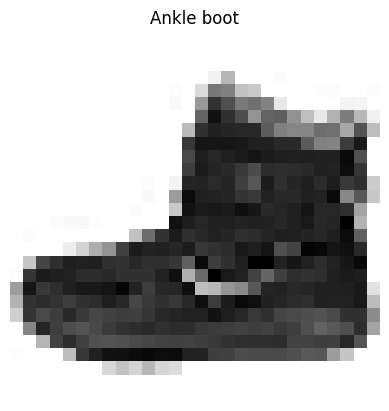

In [18]:
def plot_fashion(image_data, label_data):
    image = image_data
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.axis('off')
    plt.title(class_names[label_data])

plot_fashion(train_images[0], train_labels[0])

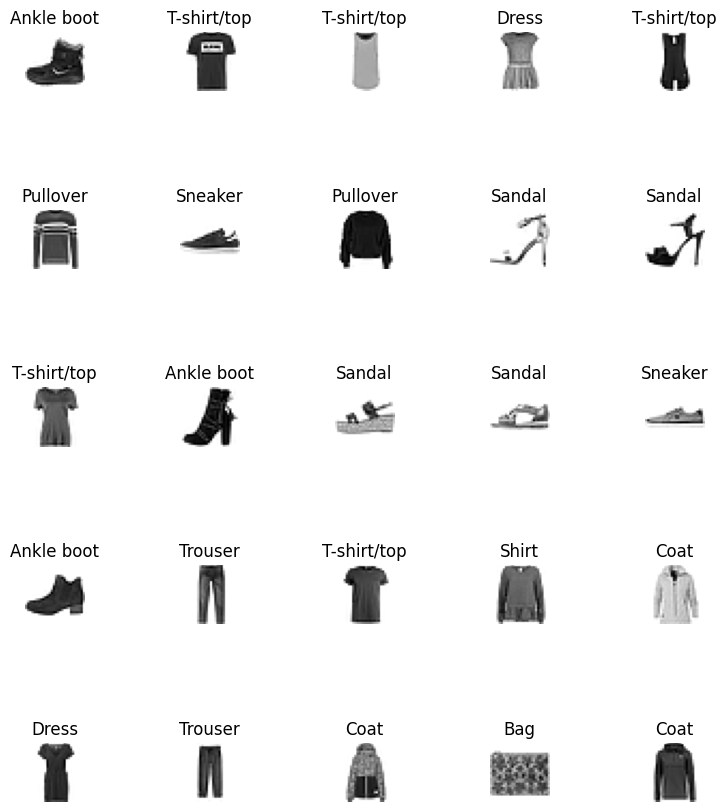

In [19]:
plt.figure(figsize=(10, 10))
for index, image in enumerate(train_images[:25]):
    plt.subplot(5, 5, index+1)
    plot_fashion(image, train_labels[index])

plt.subplots_adjust(wspace=0, hspace=2)

## Designing the Neural Network

In [20]:
model = tf.keras.models.Sequential([

    # input layer
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),

    # hidden layer
    # number of weights: 28 * 28 * 128 + 128 = 100480
    tf.keras.layers.Dense(128, activation=tf.nn.relu),

    # output layer
    # number of weights:  128 * 10 + 10 = 1290
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
len(model.layers)

3

- The first layer:
    -  `Flatten`, isn't a layer of neurons, technically it's an input layer specification.
    - It has no weights/parameters.
    - `Flatten` changes the shape from (28, 28) to (None, 784)
- The second layer:
    - The `Dense` is a layer of 128 neurons.  
    - This is a hidden layer. Layers that are between inputs and outputs are not seen by the caller, so they are described **hidden**.
    - We are asking for 128 neurons to have their internal parameters randomly initialized.
    - Why 128?
        - This is arbitrary, but there are some rules of thumb to help us choose the appropriate number
        - More neurons means it will run more slowly, as it has to learn more parameters
        - More neurons could also lead to overfitting
        - Fewer neurons means the model might not have sufficient parameters to learn
        - Choosing the number of neurons is part of the process of **hyperparameter tuning**
        - a **hyperparameter** is a value that is used to control the training, as opposed to the internal values of the neurons that get trained/learned, which are referred to as **parameters**
    - This layer also has an **activation function**
        - This is a function that is activated on each neuron on the layer
        - RELU (REctified Linear Unit) is one of the most commonly used activation functions
            - It simply returns `max(0, x)`, so it never returns a negative number
- The third layer:
    - This is also a `Dense` layer
    - It is the output layer
    - This layer has 10 neurons because we have 10 classes
    - Each of these neurons will end up with a probability that the input pixels match the class represented by a particular neuron
        - Our job is to determine which neuron has the highest value
        - We could loop through to find the highest value in order to determine the predicted class, but the `softmax` activation function does that for us
            - The `softmax` function converts a vector of $K$ real numbers into a probability distribution of $K$ possible outcomes. It is a generalization of the logistic function to multiple dimensions and used in multinomial logistic regression. It is also used as the activation function of a neural network to normalize the output of a network to a probability distribution over predicted output classes.

## Compile and Train the Model

- The compilation is done by `model.compile()`
- The training is done by `model.fit()`

In [22]:
model.compiled

False

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.compiled

True

- the **loss function** in this case is **sparse_categorical_crossentropy**
    - choosing with loss function to lose is an art in itself
    - the goal of our model is to pick a category (choose 1 of 10)
    - sparse_categorical_crossentropy is a good choice for that type of problem
- the optimizer is **adam**
    - the adam optimizer is an evolution of the stochastic gradient descent algorithm (sgd) optimizer we used in Chapter 1
        - it has been shown to be faster and more efficient
- for the **metrics** list, we added 'accuracy'

In [24]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7735 - loss: 0.6484
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8604 - loss: 0.3881
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8770 - loss: 0.3387
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8852 - loss: 0.3119
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8914 - loss: 0.2933


In [25]:
# we got `loss` automatically and
#. we got `accuracy` because we specified
#. that in the `model.compile` `metrics` argument
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [26]:
train_loss, train_accuracy = model.evaluate(train_images, train_labels)
train_loss, train_accuracy

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8914 - loss: 0.2889


(0.2918187379837036, 0.8916000127792358)

## Evaluate the Model

- An accuracy of almost 92% with just 5 epochs
- How well does it do with the test data?

In [27]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
test_loss, test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8681 - loss: 0.3716


(0.3743010461330414, 0.8665000200271606)

- The accuracy is a little lower for the test data

### Manual calculation of accuracy

In [28]:
# manual calculation of accuracy
predictions = model.predict(test_images)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.4051157e-05, 5.5270160e-11, 2.5290947e-07, ..., 6.8774521e-02,
        9.9438519e-05, 9.1556579e-01],
       [4.8768994e-05, 8.5813836e-14, 9.9807680e-01, ..., 4.1052817e-12,
        1.2729050e-08, 4.1300834e-16],
       [2.2778643e-04, 9.9976444e-01, 8.3400732e-07, ..., 1.9471884e-15,
        1.8235427e-08, 3.3512155e-11],
       ...,
       [1.6010889e-04, 7.2092501e-09, 5.6910671e-05, ..., 1.6594849e-07,
        9.9788231e-01, 7.2705864e-10],
       [1.3656808e-05, 9.9798554e-01, 3.2337766e-07, ..., 7.0950174e-10,
        4.0193427e-08, 1.6218834e-07],
       [1.2521094e-05, 3.1398404e-08, 7.2195089e-06, ..., 6.6582575e-03,
        1.0989499e-04, 8.6764216e-05]], dtype=float32)

In [29]:
sum(predictions.argmax(axis=1) == test_labels) / len(predictions)

0.8665

## Exploring the Model Output

In [30]:
# these are the values of the 10 output neurons of the first classification
# these are probabilities that should add to 1
predictions[0]

array([1.4051157e-05, 5.5270160e-11, 2.5290947e-07, 1.4269979e-09,
       4.2527499e-06, 1.5539618e-02, 2.1242902e-06, 6.8774521e-02,
       9.9438519e-05, 9.1556579e-01], dtype=float32)

In [31]:
predictions[0].sum(), predictions[0].argmax(), test_labels[0]

(1.0, 9, 9)

In [32]:
# the probability that the output is class 9
# the label is also 9, so we know that we got it right
predictions[0][9]

0.9155658

In [33]:
def plot_image(i, prediction_array, true_labels, images):
    prediction, true_label, image = prediction_array[i], true_labels[i], images[i]
    plt.axis('off')

    plt.imshow(image, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'

    plt.title('{} {:2.0f}% (Truth: {})'.format(
        class_names[predicted_label],
        100 * np.max(prediction),
        class_names[true_label]),
               color=color)

def plot_value_array(i, prediction_array, true_labels):
    prediction, true_label = prediction_array[i], true_labels[i]
    plt.grid=False
    plt.xticks([])
    plt.yticks(ticks=range(10), labels=class_names)

    bar_container = plt.barh(class_names, prediction)
    plt.xlim([0, 1])
    predicted_label = np.argmax(prediction)


    bar_container[predicted_label].set_color('red')
    bar_container[predicted_label].set_label('Predicted label')
    bar_container[true_label].set_color('blue')
    bar_container[true_label].set_label('True label')

    plt.legend()

def plot_image_prediction(i, prediction_array, true_labels, images):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_image(i, prediction_array, true_labels, images)
    plt.subplot(1, 2, 2)
    plot_value_array(i, prediction_array, true_labels)
    plt.show()

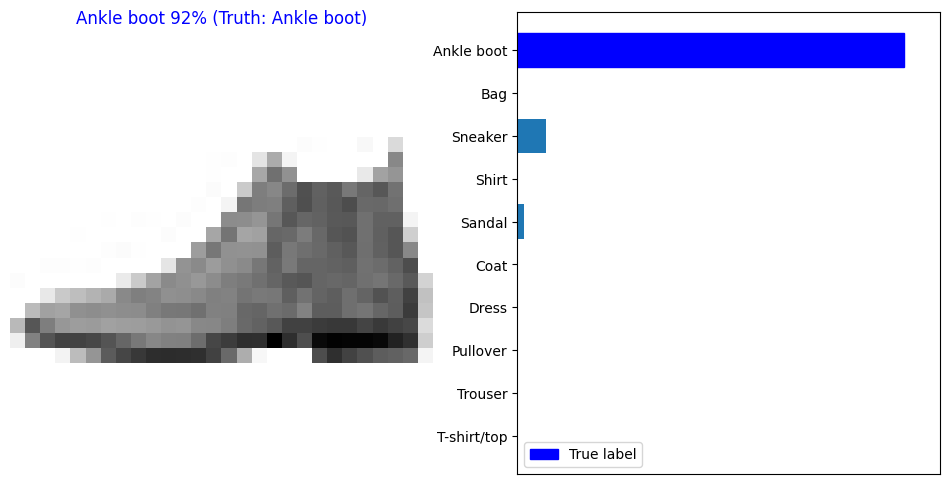

In [34]:
plot_image_prediction(0, predictions, test_labels, test_images)

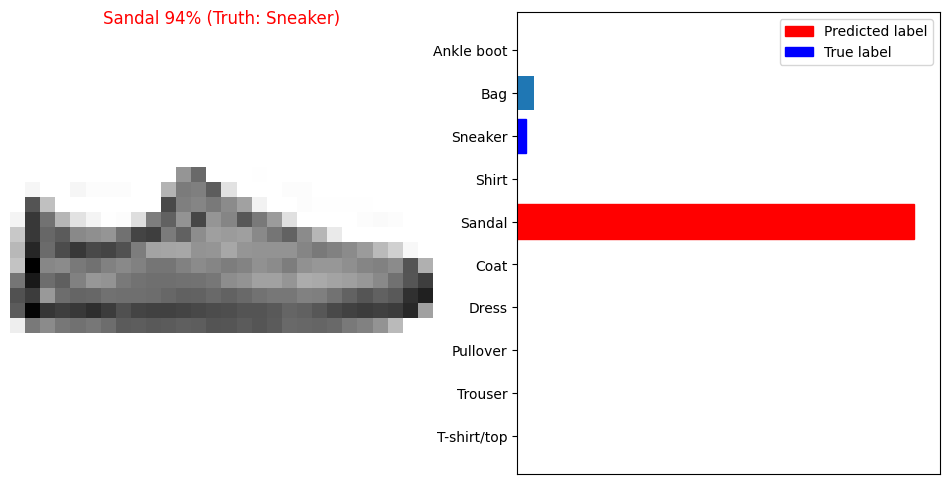

In [35]:
plot_image_prediction(12, predictions, test_labels, test_images)

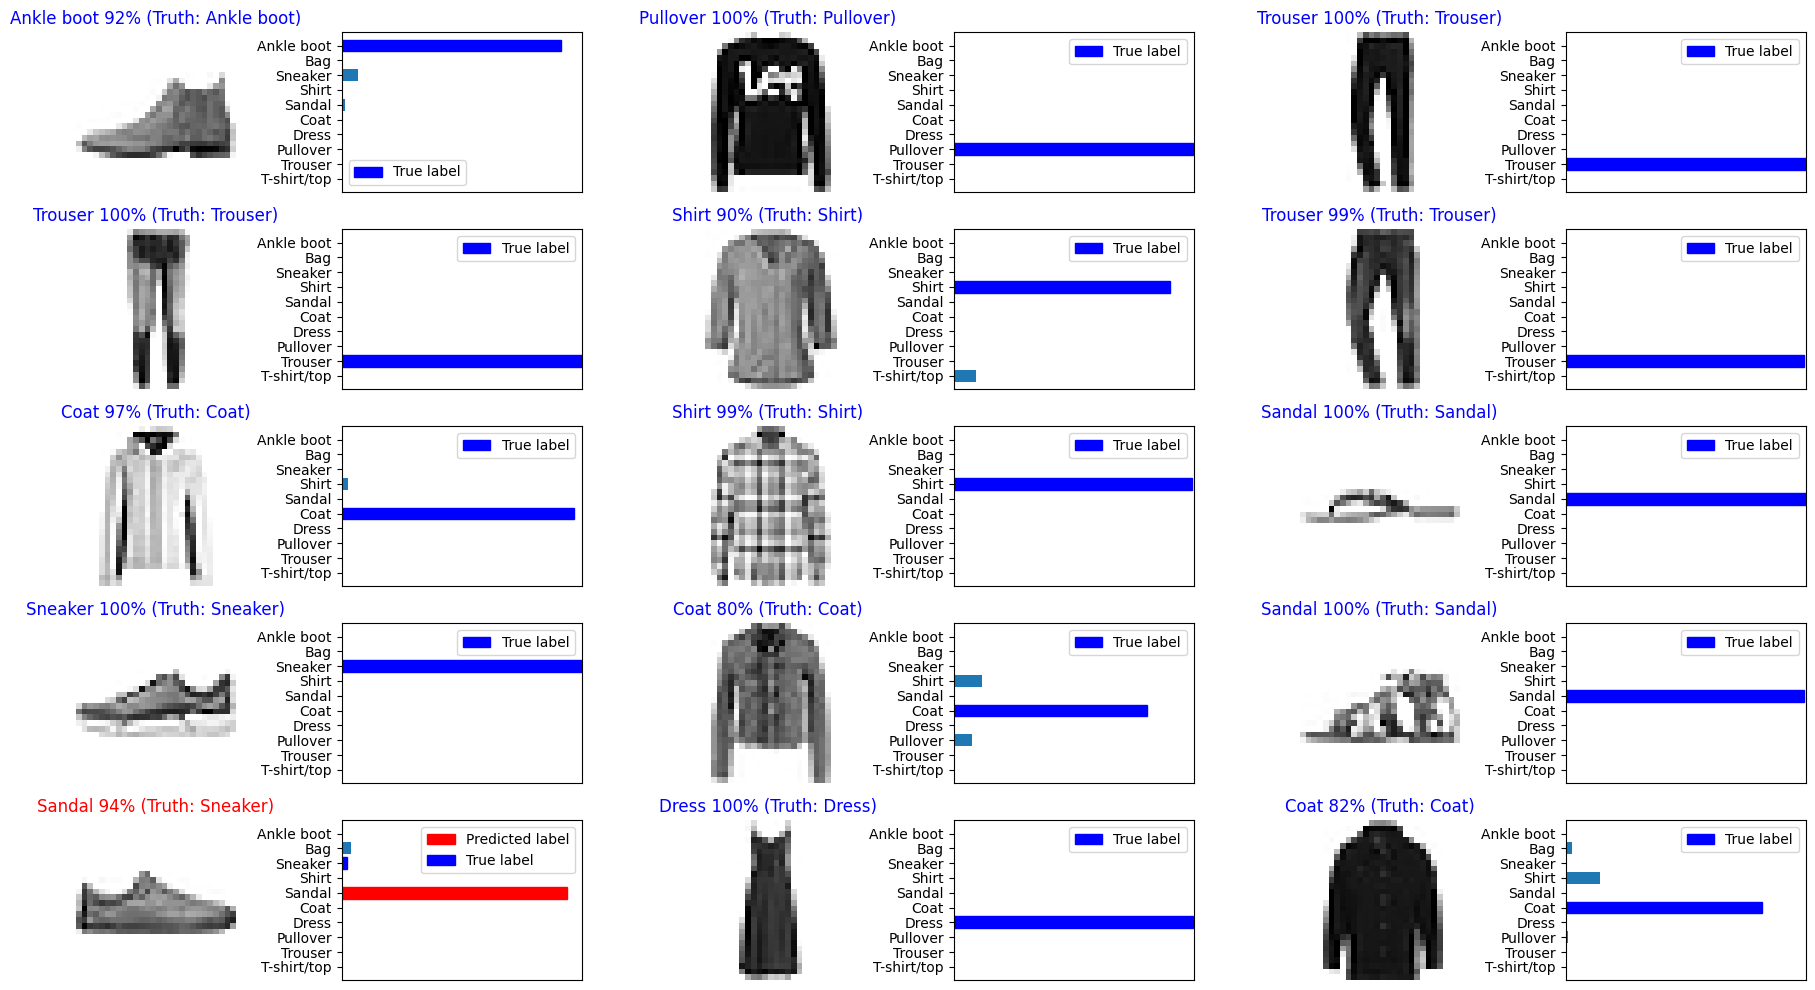

In [36]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 3 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()

### What would increasing the number of epochs do for the accuracy?

In [37]:
train_accuracy_5 = train_accuracy
test_accuracy_5 = test_accuracy

In [38]:
model.fit(train_images, train_labels, epochs=50, verbose=0)

In [39]:
_, train_accuracy_50 = model.evaluate(train_images, train_labels)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9686 - loss: 0.0838


In [40]:
_, test_accuracy_50 = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8924 - loss: 0.4887


In [41]:
# a big improvement, this is not always the case
#. when increasing the number of epochs
train_accuracy_5, train_accuracy_50

(0.8916000127792358, 0.9680500030517578)

In [42]:
# not much of an improvement
test_accuracy_5, test_accuracy_50

(0.8665000200271606, 0.88919997215271)

We can see that, in this case, when we increase the number of epochs, the divergence in the accuracy increases. The model has become overspecialized to the training data: **overfitting**.

In [43]:
predictions5 = predictions

In [44]:
predictions50 = model.predict(test_images)
predictions50

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.06019326e-17, 6.49158569e-28, 3.02805183e-26, ...,
        3.59357671e-07, 6.78819721e-19, 9.99999583e-01],
       [1.41330190e-06, 5.44423649e-27, 9.99995053e-01, ...,
        1.20734262e-23, 7.88349329e-25, 9.75988415e-31],
       [3.81571097e-14, 9.99999940e-01, 2.01686092e-29, ...,
        0.00000000e+00, 2.44684980e-31, 2.26039588e-38],
       ...,
       [1.73512815e-10, 2.64812178e-29, 6.92475232e-19, ...,
        6.98682429e-24, 9.99999940e-01, 8.06200021e-38],
       [5.69977538e-19, 9.99999940e-01, 6.90776787e-32, ...,
        0.00000000e+00, 5.36615197e-22, 7.08473985e-22],
       [4.47786565e-11, 1.53313839e-20, 1.81190868e-14, ...,
        8.29915734e-05, 1.76372094e-11, 5.81183823e-10]], dtype=float32)

In [55]:
mismatches = predictions5.argmax(axis=1) != predictions50.argmax(axis=1)
mismatches.sum()

1111

In [67]:
mismatch_indices = np.where(mismatches == True)[0]
mismatch_indices = mismatch_indices[:15] # the first 15

In [68]:
len(predictions), len(predictions[mismatch_indices])

(10000, 15)